In [54]:
## IMPORTS


# External modules
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
## FUNCTIONS

def occurrence_time_series(word_list, articles_info):
    # Convert 'timestamp' column to datetime format
    articles_info['timestamp'] = pd.to_datetime(articles_info['timestamp'])
    
    # Get start and end dates
    start_date = articles_info['timestamp'].min().to_period('M')
    end_date = articles_info['timestamp'].max().to_period('M')
    
    # Create a new DataFrame to store the results with index = months and words as columns
    result_df = pd.DataFrame(columns=word_list, index=pd.period_range(start_date, end_date, freq='M'))

    result_df = result_df.fillna(0)
    
    # Iterate over each word and count occurrences in each month
    for word in word_list:
        for index, row in articles_info.iterrows():
            if word in row['content']:
                result_df.loc[row['timestamp'].to_period('M'), word] += 1
    
    return result_df

In [57]:
## DATA


# ARTICLES
articles_info = pd.read_json('../temporary-files/artnews_articles_info.json')

# STYLES
styles = ['Abstract', 'Fine Art', 'Modern', 'Abstract Expressionis',
          'Expressionis', 'Figurati', 'Impressionis', 'Realis',
          'Conceptual', 'Minimalis', 'Portrait', 'Pop Art', 'Surrealis',
          'Illustrati', 'Art Deco', 'Street Art', 'Photorealis', 'Folk',
          'Cubis', 'Documentar', 'Dada']

# ARTISTS
artists_info_path = '../temporary-files/saatchi_artists_info.json'
artists_info = pd.read_json(artists_info_path)
artists_names = artists_info['name'].tolist()

In [58]:
# TIME SERIES: occurence of Artists and Styles in articles

# Retrieve artnews_articles_info
artists_time_series = occurrence_time_series(artists_names, articles_info)
styles_time_series = occurrence_time_series(styles, articles_info)

KeyError: 'content'

<Axes: >

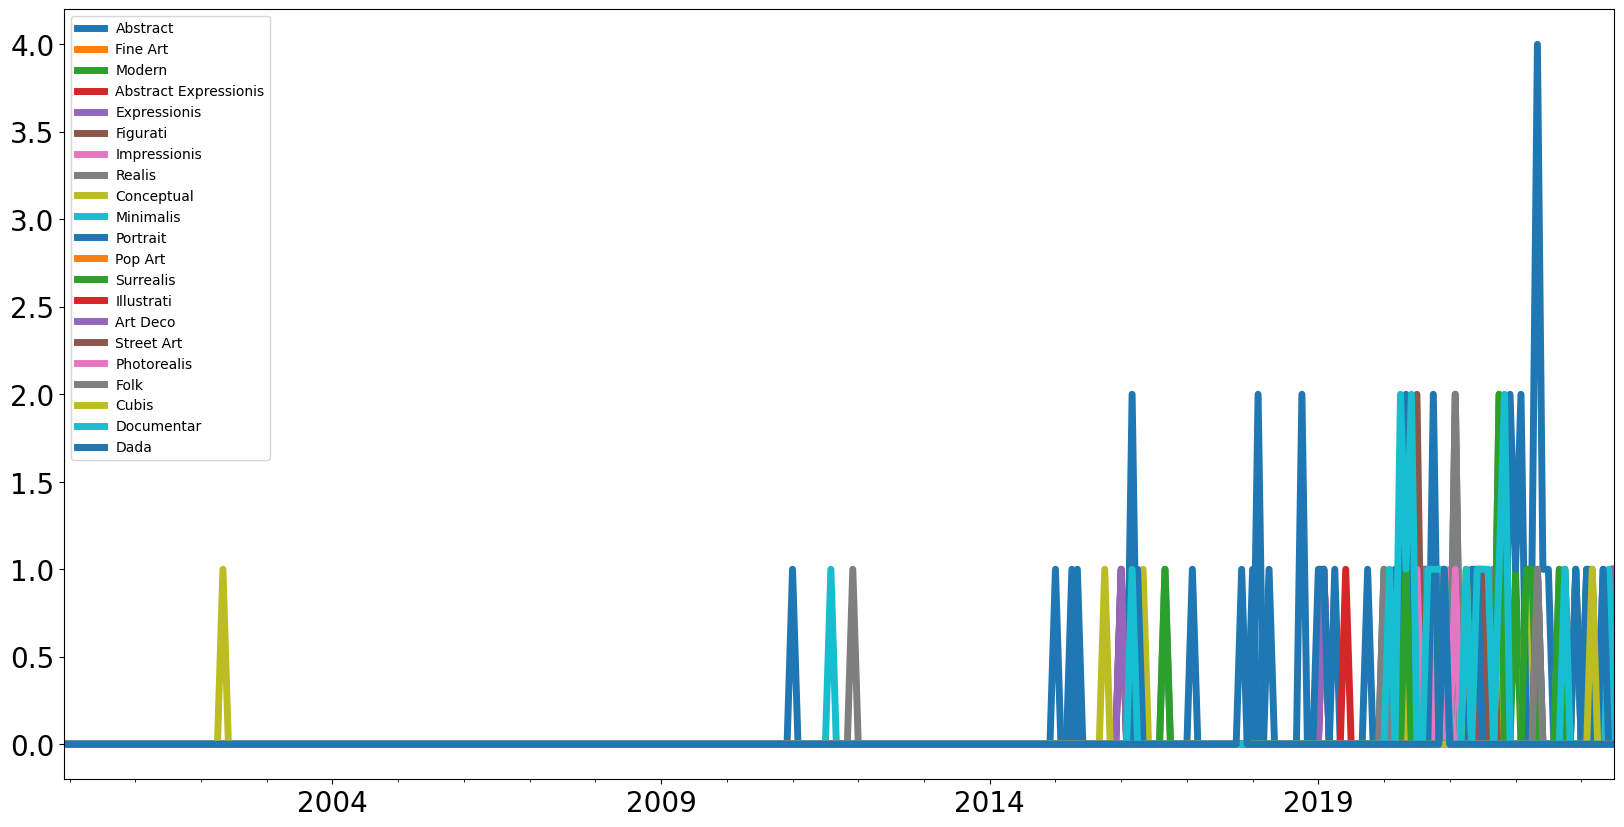

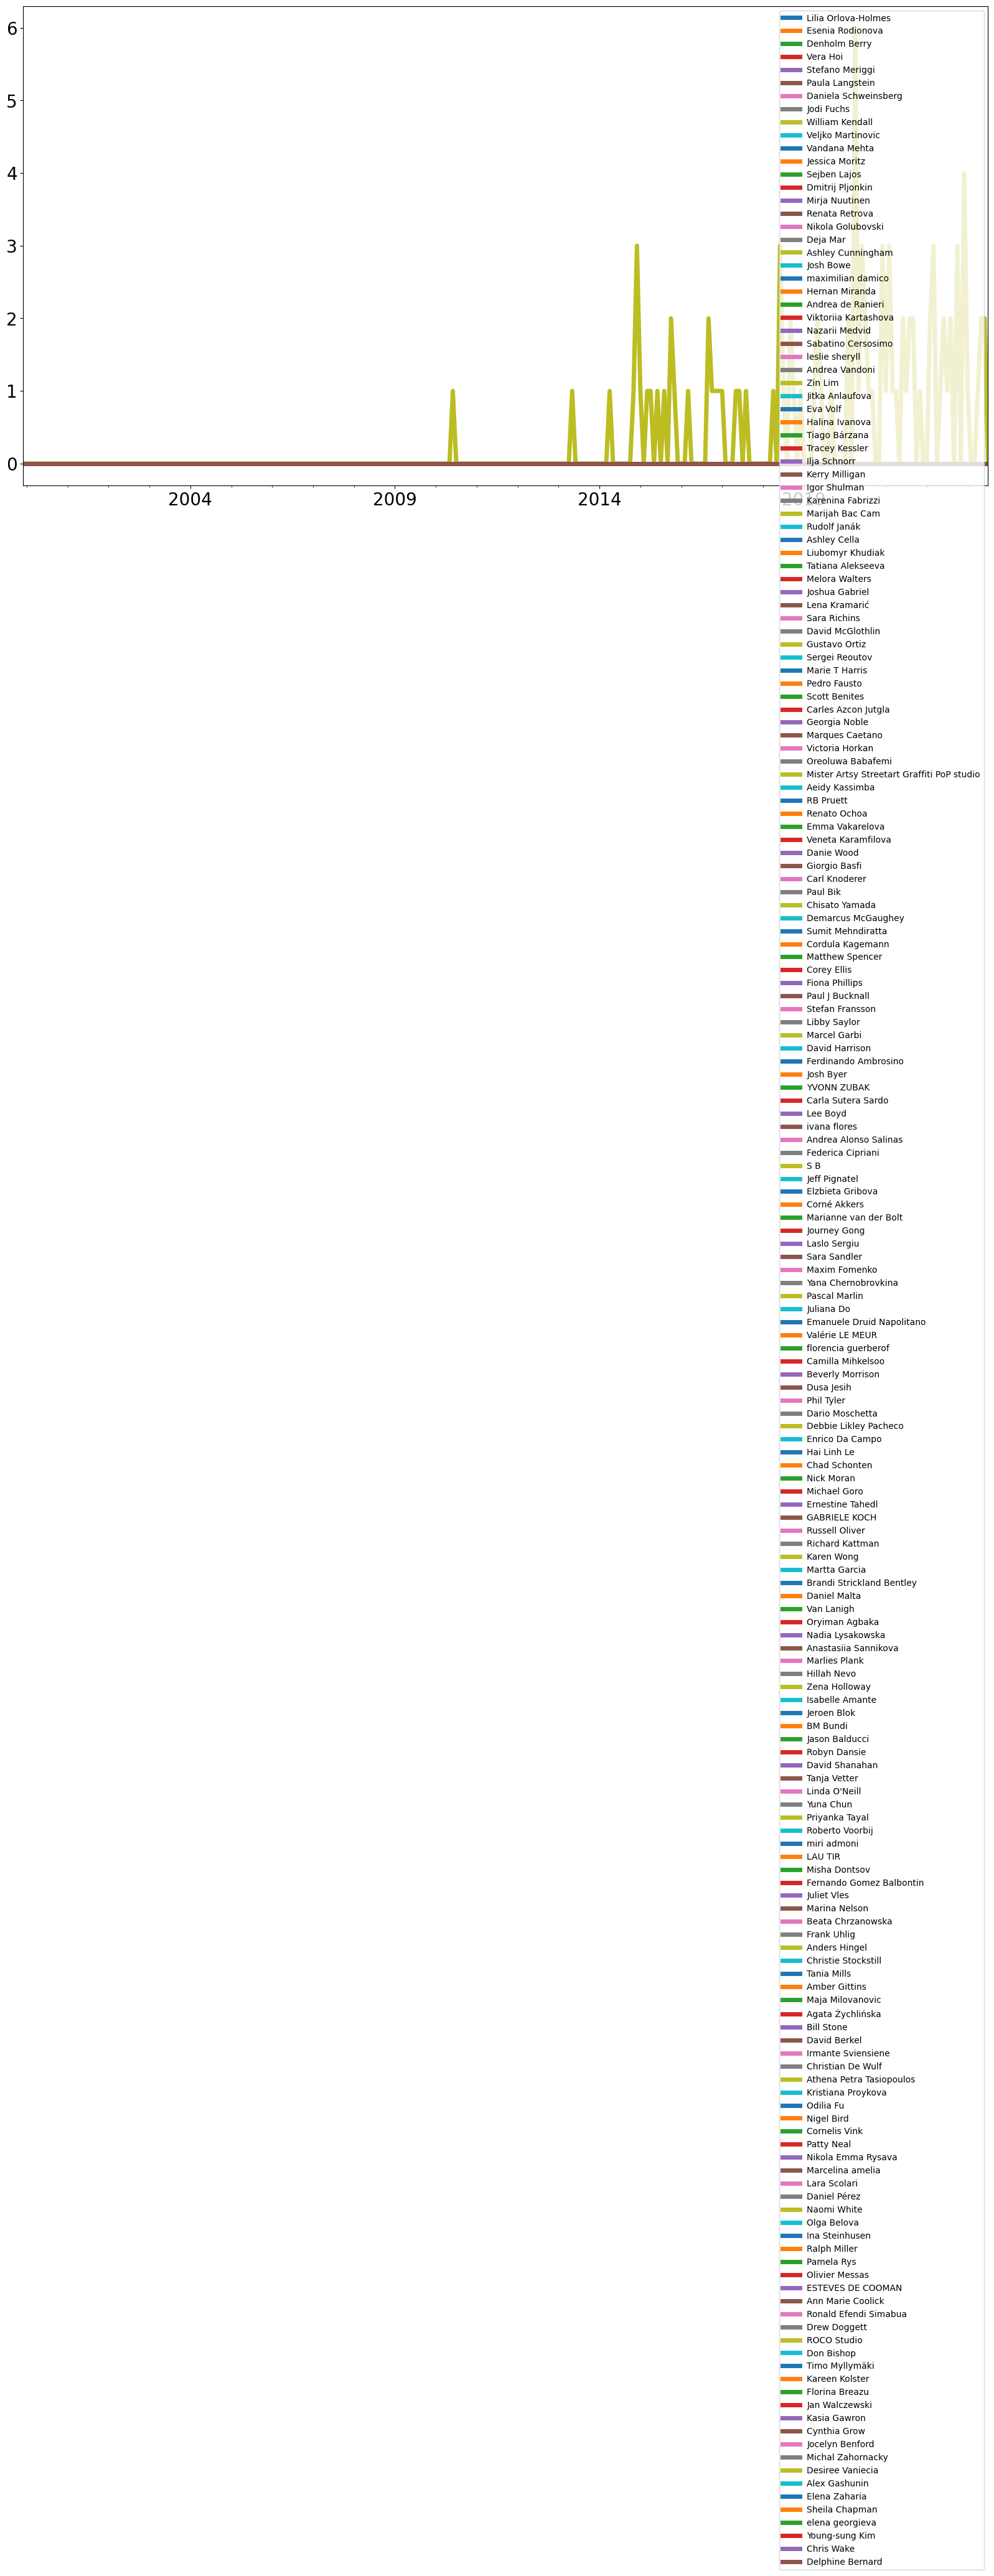

In [ ]:
## CHARTS

# Plot styles time series with styles as y axis and months as x axis
styles_time_series.transpose().plot(figsize=(20,10), linewidth=5, fontsize=20)
artists_time_series.transpose().plot(figsize=(20,10), linewidth=5, fontsize=20)